In this project I will analyze a movie dataset; the only useful infos will be rating and number of rating a certain movie got from the users.

Based off this, selecting a film in the list with a meaningful number of ratings, I will build a model to predict which other movie in the list worth to see if you enjoyed the selected one.

In [ ]:
import numpy as np
import pandas as pd

In [2]:
column_names=['user_id','item_id','rating','timestamp']

In [3]:
df = pd.read_csv('u.data',sep='\t',names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles=pd.read_csv('Movie_Id_Titles')

In [5]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df = pd.merge(df,movie_titles,on='item_id')

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [41]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Let us take some plot in order to get acquainted with the dataset:

<AxesSubplot:>

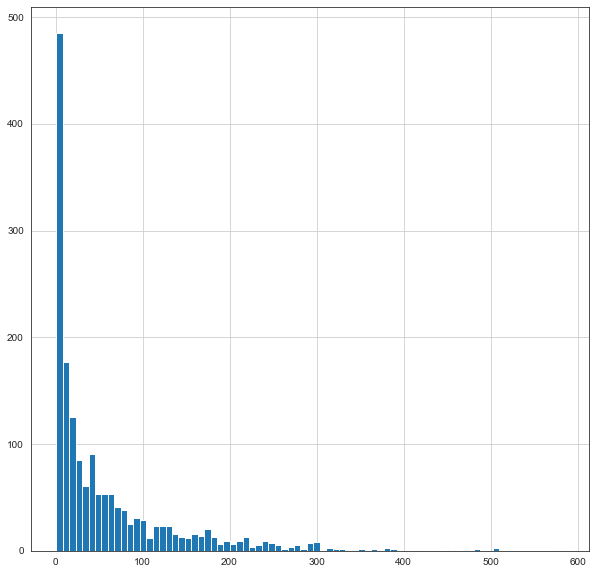

In [42]:
plt.figure(figsize=(10,10))
ratings['num of ratings'].hist(bins=79)

Very few movies got a meaningful number of ratings (less then 10 have more than 100 ratings).

Let's take a look now the most given ratings:

<AxesSubplot:>

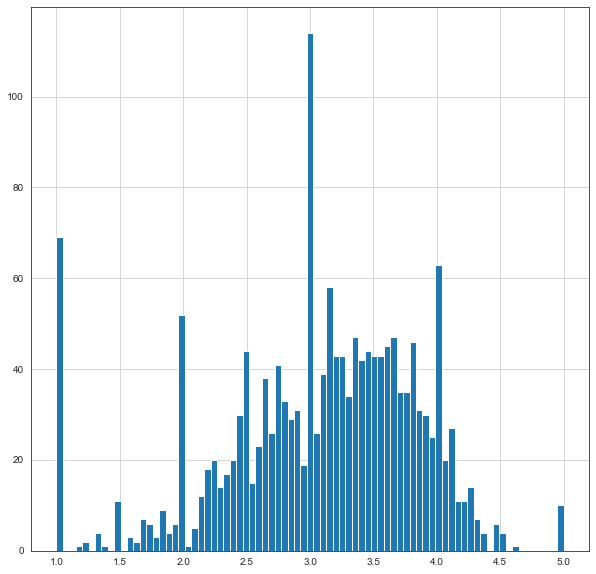

In [43]:
plt.figure(figsize=(10,10))
ratings['rating'].hist(bins=79)

... and look at how are they related:

<Figure size 1440x1440 with 0 Axes>

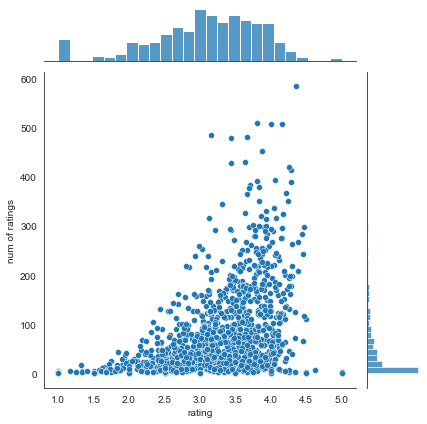

In [17]:
plt.figure(figsize=(20,20))
sns.jointplot(data=ratings,x='rating',y='num of ratings')

As already pointed out, most of movies got few ratings; nevertheless here we see that the better the movie is (in average) rated, the highest the number of ratings.

Now I gather my data, highlighting which user gave which rating to which movie:

In [18]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [19]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The problem is that most of the people have not seen most of the movies! Let's thus pick up a couple of them among the most rated ones:

In [20]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's pick up *Star Wars* and *Liar Liar* for instance. For each of them let's take a look to users ratings:

In [21]:
sw_user_rating=moviemat['Star Wars (1977)']
ll_user_rating=moviemat['Liar Liar (1997)']

These last two series have very few NaN!

In [22]:
sw_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [23]:
similar_to_sw=moviemat.corrwith(sw_user_rating)

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
similar_to_sw.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

We have isolated SW rating column and then we computed the correlation of this with all the others (which makes sense since SW is the most rated movie, therefore NaN are very few). The result is the list of the movie based off the correlation with SW.

Let's clear NaN and transform from Series to a dataframe.

In [25]:
similar_to_sw.dropna(inplace=True)
corr_sw = pd.DataFrame(similar_to_sw,columns=['Correlation'])

In [26]:
corr_sw.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [27]:
corr_sw.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [28]:
corr_sw = corr_sw.join(ratings['num of ratings'])
corr_sw.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [29]:
corr_sw[corr_sw['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [30]:
corr_sw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 'Til There Was You (1997) to unknown
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Correlation     1410 non-null   float64
 1   num of ratings  1410 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 65.3+ KB


In [31]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          1664 non-null   float64
 1   num of ratings  1664 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 103.5+ KB


Let's do the same for *Liar Liar*:

In [32]:
sim_to_ll=moviemat.corrwith(ll_user_rating)

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [33]:
sim_to_ll.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [34]:
sim_to_ll.dropna(inplace=True)

In [35]:
corr_to_ll=pd.DataFrame(sim_to_ll,columns=['correlation'])

In [36]:
corr_to_ll.sort_values('correlation',ascending=False).head()

,correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0


In [37]:
corr_to_ll=corr_to_ll.join(ratings['num of ratings'])

In [38]:
corr_to_ll.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [39]:
corr_to_ll[corr_to_ll['num of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
